In [95]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
digits=load_digits()

In [97]:
X=digits.data
y=digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
svm_clf=SVC(kernel="linear")
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(classification_report(y_test,y_pred))
"""
class sklearn.svm.SVC(, C=1.0, kernel='rbf', degree-3, gamma='scale',
coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max iter=-1,
decision_function_shape="ovr", break_tles=False, random_state=None)"""

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



'\nclass sklearn.svm.SVC(, C=1.0, kernel=\'rbf\', degree-3, gamma=\'scale\',\ncoef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max iter=-1,\ndecision_function_shape="ovr", break_tles=False, random_state=None)'

0.9777777777777777
0.9861111111111112
0.4666666666666667


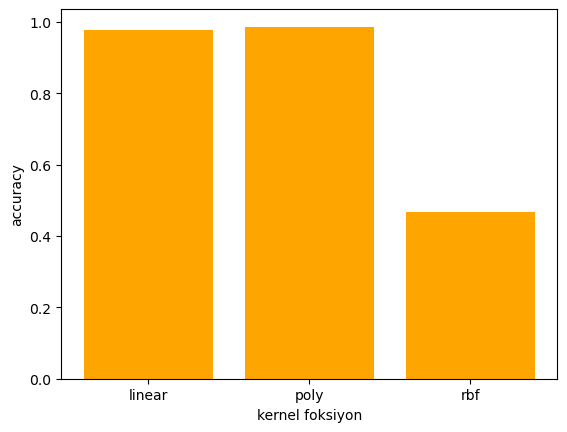

In [99]:
kernel=['linear','poly','rbf']
acc=np.empty(len(kernel))
for i,k in enumerate(kernel):
    svm=SVC(kernel=k,C=1,gamma='auto')
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_test)
    acc[i]=accuracy_score(y_test,y_pred)
    print(acc[i])
plt.bar(kernel,acc,color="orange")
plt.xlabel("kernel foksiyon")
plt.ylabel("accuracy")
plt.show()


In [100]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[14  0  0 19  0  0  0  0  0  0]
 [ 0 20  0  8  0  0  0  0  0  0]
 [ 0  0 16 17  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0 33 13  0  0  0  0  0]
 [ 0  0  0 44  0  3  0  0  0  0]
 [ 0  0  0  9  0  0 26  0  0  0]
 [ 0  0  0 15  0  0  0 19  0  0]
 [ 0  0  0 16  0  0  0  0 14  0]
 [ 0  0  0 31  0  0  0  0  0  9]]


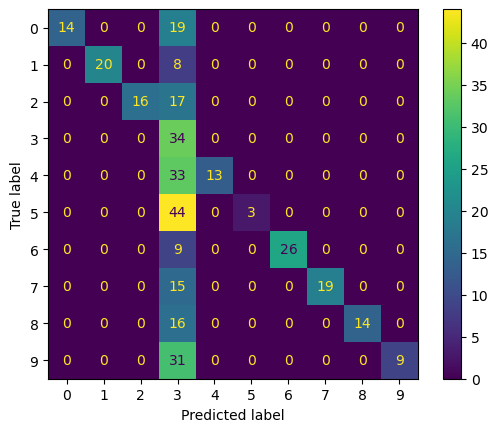

In [101]:
disp=ConfusionMatrixDisplay(confusion_matrix,display_labels=svm_clf.classes_)
disp.plot()
plt.show()

In [102]:
from sklearn import datasets
from sklearn.model_selection import KFold,cross_val_score
X,y=datasets.load_iris(return_X_y=True)
clf=SVC(kernel="linear")
k_folds=KFold(n_splits=5)
scores=cross_val_score(clf,X,y,cv=k_folds)
print("cross",scores)
print("average",scores.mean())
print("number",len(scores))

cross [1.         1.         0.86666667 1.         0.86666667]
average 0.9466666666666667
number 5
